# Google Local Data (2021)

**Citation**

**UCTopic: Unsupervised Contrastive Learning for Phrase Representations and Topic Mining**  
Jiacheng Li, Jingbo Shang, Julian McAuley  
*Annual Meeting of the Association for Computational Linguistics (ACL)*, 2022  
[pdf](https://aclanthology.org/2022.acl-long.426.pdf)


**Personalized Showcases: Generating Multi-Modal Explanations for Recommendations**  
An Yan, Zhankui He, Jiacheng Li, Tianyang Zhang, Julian Mcauley  
*The 46th International ACM SIGIR Conference on Research and Development in Information Retrieval (SIGIR)*, 2023  
[pdf](https://arxiv.org/pdf/2207.00422.pdf)

# Cleaning and Preprocessing

We decide to focus on the resturants in Massachusetts, which includes 5,624,944 reviews and 92,520 businesses in metadata.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Review

Since the complete Massachusetts review data is 3.03GB and even reading the file takes too long, we use the reduced 10-core review dat (1.44GB). We think this is reasonable because it ensures a **sufficient level of interaction data** for each entity, enabling more reliable and robust analysis or model training.

In [2]:
review_ma = pd.read_json('data/review-Massachusetts_10.json', lines=True)
review_ma.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.180340e+20,Donna Carlson,1619732714443,5,People run it make sure you are comfortable,None,None,0x89e4a103dd188585:0xfadc47938337579f
1,1.101673e+20,michael simmons,1615400031636,5,When you need a helping hand.,None,None,0x89e4a103dd188585:0xfadc47938337579f
2,1.122136e+20,Paul Murray,1593992657241,5,Very Helpful and understanding people definite...,None,None,0x89e4a103dd188585:0xfadc47938337579f
3,1.081745e+20,Elba De Oliveira,1582074606394,5,Very good place nice things but on Saturday th...,None,None,0x89e4a103dd188585:0xfadc47938337579f
4,1.089901e+20,Sherri Mayne,1572962045881,5,Awesome place,None,None,0x89e4a103dd188585:0xfadc47938337579f


## Metadata

In [3]:
metadata_ma = pd.read_json('data/meta-Massachusetts.json', lines=True)
metadata_ma.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Grace Ryder Housing Center,"Grace Ryder Housing Center, Marshfield, MA 02050",0x89e4a1f2d39fb621:0xfe62e9b7266e6262,None,42.098673,-70.719751,[Senior citizen center],4.8,3,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x89e4a6ce94008f83:0x48244c8afd7f8d76, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...
1,Sowing Seeds,"Sowing Seeds, 974 Plain St, Marshfield, MA 02050",0x89e4a103dd188585:0xfadc47938337579f,None,42.107184,-70.757536,[Non-profit organization],4.6,8,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x89e4a6d00319316d:0x5d22d9b17e568648, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...
2,TLC Kennels,"TLC Kennels, 729 Center St, Pembroke, MA 02359",0x89e49871023b3407:0xd93aabe6f7940a6b,None,42.032471,-70.820770,[Kennel],4.0,4,None,None,None,None,"[0x89e4a1c4b9d12e9b:0xc13185ea1dbed01a, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...
3,Pine Hill Sand & Gravel,"Pine Hill Sand & Gravel, 498 Old Westport Rd, ...",0x89e4fcdcfa2fdba5:0xb10b326e00a0fd0,None,41.626680,-71.022437,[Sand & gravel supplier],5.0,2,None,None,None,None,"[0x89e4fd3555b4674f:0x6d70e26b40185165, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...
4,Workout Club,"Workout Club, Webster Square, Marshfield, MA 0...",0x89e4a6c554aa0e59:0x45965ec598f57a3,None,42.089767,-70.708462,[Gym],4.5,4,None,"[[Thursday, 5:30AM–1PM], [Friday, 5:30AM–1PM],...",{'Accessibility': ['Wheelchair accessible entr...,Closes soon ⋅ 1PM ⋅ Reopens 4PM,"[0x89e4a6d001adbf99:0xdeb84714d054a18c, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...


In [4]:
# Filter out restaurants based on business category
restaurant_ma = metadata_ma[metadata_ma['category'].apply(lambda x: 'Restaurant' in x if isinstance(x, list) else False)]

In [22]:
data_ma = pd.merge(review_ma, restaurant_ma, on='gmap_id', how='inner')
data_ma.to_csv("data/data_ma.csv", index=False)
print("Number of restaurant reviews in MA:", len(data_ma))

Number of restaurant reviews in MA: 1253377


## Missing Data

In [6]:
data_ma[-data_ma['text'].isna()]

,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,...,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,1.007721e+20,Chris McCorkindale,1462293150986,5,"The food and ambiance are great, and there is ...",None,None,0x89e3706a62ba248f:0xdd2878d145d53400,La Sanghita Cafe,"La Sanghita Cafe, 389 Maverick St, Boston, MA ...",...,-71.029044,[Restaurant],4.8,14,None,None,"{'Service options': ['Delivery'], 'Highlights'...",None,"[0x89e371cb53850b7f:0x7e6646ef9ede69d8, 0x89e3...",https://www.google.com/maps/place//data=!4m2!3...
1,1.007721e+20,Chris McCorkindale,1462293150986,5,"The food and ambiance are great, and there is ...",None,None,0x89e3706a62ba248f:0xdd2878d145d53400,La Sanghita Cafe,"La Sanghita Cafe, 389 Maverick St, Boston, MA ...",...,-71.029044,[Restaurant],4.8,14,None,None,"{'Service options': ['Delivery'], 'Highlights'...",None,"[0x89e371cb53850b7f:0x7e6646ef9ede69d8, 0x89e3...",https://www.google.com/maps/place//data=!4m2!3...
2,1.103580e+20,Leo D,1442169115304,5,"Great location in East Boston, nice place. exc...",None,None,0x89e3706a62ba248f:0xdd2878d145d53400,La Sanghita Cafe,"La Sanghita Cafe, 389 Maverick St, Boston, MA ...",...,-71.029044,[Restaurant],4.8,14,None,None,"{'Service options': ['Delivery'], 'Highlights'...",None,"[0x89e371cb53850b7f:0x7e6646ef9ede69d8, 0x89e3...",https://www.google.com/maps/place//data=!4m2!3...
3,1.103580e+20,Leo D,1442169115304,5,"Great location in East Boston, nice place. exc...",None,None,0x89e3706a62ba248f:0xdd2878d145d53400,La Sanghita Cafe,"La Sanghita Cafe, 389 Maverick St, Boston, MA ...",...,-71.029044,[Restaurant],4.8,14,None,None,"{'Service options': ['Delivery'], 'Highlights'...",None,"[0x89e371cb53850b7f:0x7e6646ef9ede69d8, 0x89e3...",https://www.google.com/maps/place//data=!4m2!3...
4,1.089811e+20,Brandon Healy,1498438964371,5,We loved this place and are sad that it is closed,None,None,0x89e3706a62ba248f:0xdd2878d145d53400,La Sanghita Cafe,"La Sanghita Cafe, 389 Maverick St, Boston, MA ...",...,-71.029044,[Restaurant],4.8,14,None,None,"{'Service options': ['Delivery'], 'Highlights'...",None,"[0x89e371cb53850b7f:0x7e6646ef9ede69d8, 0x89e3...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253292,1.066413e+20,Vincent Goodridge,1475765682049,5,Great food wonderful people,None,None,0x89e5290944643609:0x6b5cbf7224fe52bc,Martha's Vineyard Chowder Company,"Martha's Vineyard Chowder Company, 9 Oak Bluff...",...,-70.557289,"[Seafood restaurant, American restaurant, Rest...",4.4,445,$$,"[[Thursday, Closed], [Friday, Closed], [Saturd...","{'Service options': ['Outdoor seating', 'Curbs...",NaN,[0x89e52e9e67f513eb:0x88cd497e3d3b6053],https://www.google.com/maps/place//data=!4m2!3...
1253293,1.155822e+20,Jim Mannoia,1467054822762,4,Good chowder,None,None,0x89e5290944643609:0x6b5cbf7224fe52bc,Martha's Vineyard Chowder Company,"Martha's Vineyard Chowder Company, 9 Oak Bluff...",...,-70.557289,"[Seafood restaurant, American restaurant, Rest...",4.4,445,$$,"[[Thursday, Closed], [Friday, Closed], [Saturd...","{'Service options': ['Outdoor seating', 'Curbs...",NaN,[0x89e52e9e67f513eb:0x88cd497e3d3b6053],https://www.google.com/maps/place//data=!4m2!3...
1253294,1.101792e+20,Thatcher Ulrich,1388615442703,5,The chowder actually is exceptionally delicious.,None,None,0x89e5290944643609:0x6b5cbf7224fe52bc,Martha's Vineyard Chowder Company,"Martha's Vineyard Chowder Company, 9 Oak Bluff...",...,-70.557289,"[Seafood restaurant, American restaurant, Rest...",4.4,445,$$,"[[Thursday, Closed], [Friday, Closed], [Saturd...","{'Service options': ['Outdoor seating', 'Curbs...",NaN,[0x89e52e9e67f513eb:0x88cd497e3d3b6053],https://www.google.com/maps/place//data=!4m2!3...
1253295,1.052239e+20,Heiko Hayn,1570313401470,5,"(Translated by Google) Nice service, great ser...",None,None,0x89e5290944643609:0x6b5cbf7224fe52bc,Martha's Vineyard Chowder Company,"Martha's Vi

In [7]:
print(f"Percentage of missing review text: {data_ma['text'].isna().sum()/len(data_ma)*100:.2f}%")

Percentage of missing review text: 47.33%


Having 660,100 rows with review text is indeed a substantial amount of data for our subsequent NLP tasks. It's important to note that text data is inherently qualitative and context-dependent, making it challenging to accurately impute missing values. Therefore, it's reasonable to proceed with non-null review text when incorporating NLP techniques

In [8]:
print(f"Percentage of reviews with missing values in 'price' column: {data_ma['price'].isna().sum()/len(data_ma)*100:.2f}%")

Percentage of reviews with missing values in 'price' column: 8.76%


While location can be a factor in determining the price range of a restaurant, it's not the sole determinant. Other factors such as the quality of food, ambiance, service, and overall reputation also play significant roles. Therefore, our first thought of imputing the missing price indicators solely based on longitude and latitude may not accurately reflect the true price range of the restaurants.

With only 8.76% of reviews having missing values in the 'price' column, the overall impact on the analysis may be limited.

Instead of imputing missing price indicators, an alternative approach could be to incorporate the price information directly into the text data. By concatenating the price indicator into the review text, such as **"the price is '$$$'"**, we can ensure that this information is captured and utilized in subsequent analyses.

## Exploratory Data Analysis

In [42]:
data_ma['user_id'].unique().shape

(188265,)

In [40]:
restaurant_ma['num_of_reviews'].describe()

count    6672.000000
mean      303.956535
std       386.575410
min         1.000000
25%        55.000000
50%       168.000000
75%       418.000000
max      5694.000000
Name: num_of_reviews, dtype: float64

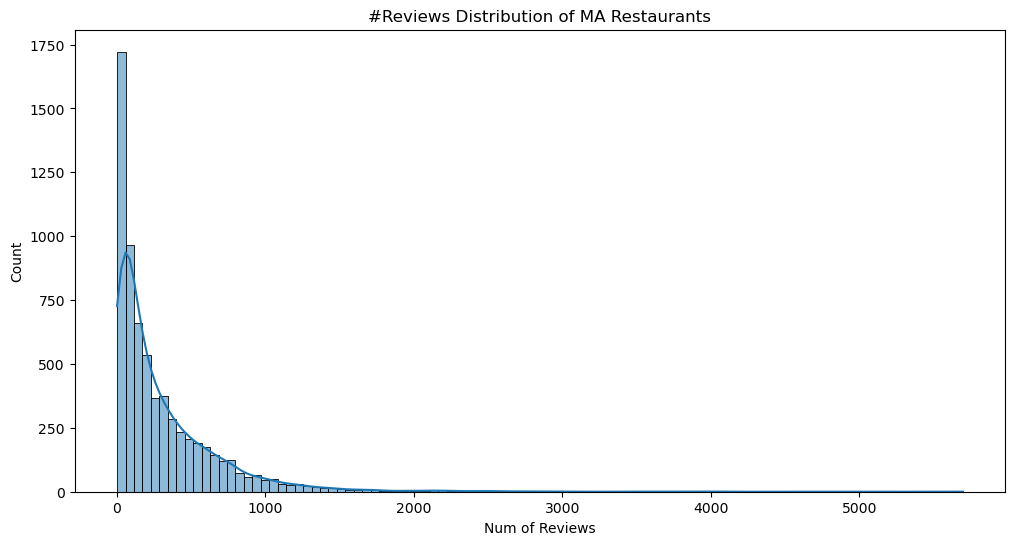

In [41]:
plt.figure(figsize=(12, 6))
# sns.countplot(x='num_of_reviews', data=restaurant_ma)
sns.histplot(restaurant_ma['num_of_reviews'], bins=100, kde=True)
plt.title('#Reviews Distribution of MA Restaurants')
plt.xlabel('Num of Reviews')
plt.ylabel('Count')
# plt.xticks(rotation=45)
# Show only a subset of ticks to avoid overcrowding
# ticks = plt.gca().get_xticks()
# plt.gca().set_xticks(ticks[::50])
plt.show()

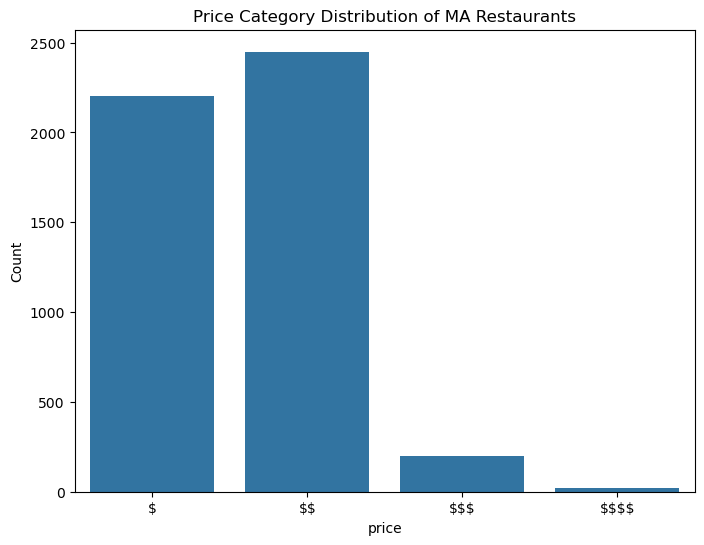

In [50]:
plt.figure(figsize=(8, 6))

valid_prices = restaurant_ma['price'].dropna().astype(str)
price_lengths = valid_prices.apply(len)

sns.countplot(x=price_lengths)
plt.title('Price Category Distribution of MA Restaurants')
xticklabels = [r'{}'.format('\$' * p) for p in sorted(price_lengths.unique())]
plt.xticks(range(len(xticklabels)), xticklabels) 
plt.ylabel('Count')
plt.show()

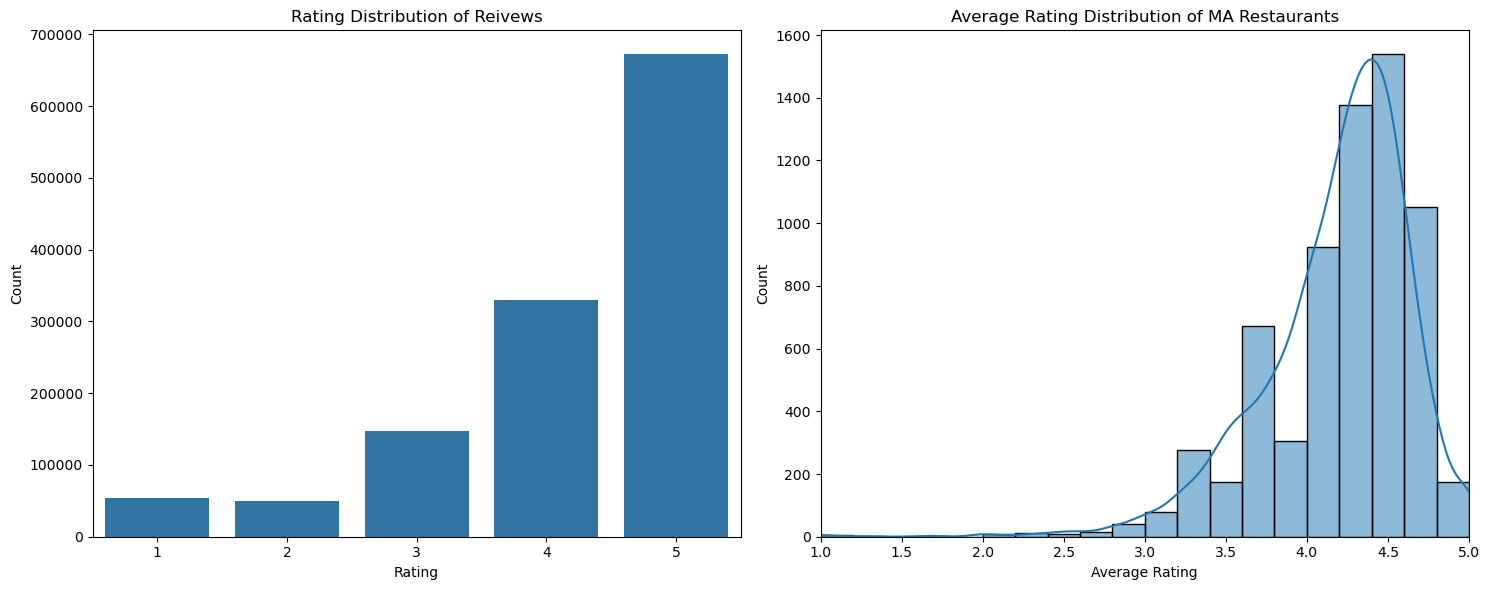

In [24]:
# Visualize Rating Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Review Rating Distribution
sns.countplot(x='rating', data=data_ma, ax=axes[0])
axes[0].set_title('Rating Distribution of Reivews')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')

# Plot Average Rating of Restaurants
sns.histplot(restaurant_ma['avg_rating'], ax=axes[1], bins=20, kde=True)
axes[1].set_title('Average Rating Distribution of MA Restaurants')
axes[1].set_xlabel('Average Rating')
axes[1].set_xlim([1,5])
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()